**CS306: DATA ANALYSIS AND VISUALIZATION**
---

LAB 2: TEMPERATURE DATA ANALYSIS

STUDENT ID: 201801407

NAME: PRATVI SHAH

---

Same station was used to perform the required analysis .


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbrn
import scipy.stats as sts

In [ ]:
data=pd.read_csv('Temperature_2020.csv')
print('Imported data: \n',data.head())

Imported data: 
              STATION          STATION_NAME      DATE  TMAX  TMIN
0  GHCND:ASN00023013  PARAFIELD AIRPORT AS  20140101   339   239
1  GHCND:ASN00023013  PARAFIELD AIRPORT AS  20140102   228   167
2  GHCND:ASN00023013  PARAFIELD AIRPORT AS  20140103   245   154
3  GHCND:ASN00023013  PARAFIELD AIRPORT AS  20140104   239   144
4  GHCND:ASN00023013  PARAFIELD AIRPORT AS  20140105   232   142


In [ ]:
df=data.loc[data['STATION'] == 'GHCND:ASN00023887']

In [ ]:
df.dropna();
mx_mean=df['TMAX'].mean()
mn_mean=df['TMIN'].mean()

pd.set_option('mode.chained_assignment',None)
#REPLACING THE OUTLIER AND THE UNACCEPTED VALUES
#(LIKE NEGATIVE FOR TEMPERATURE IN KELVIN) WITH THE MEAN OBTAINED
df['TMAX'] = df['TMAX'].apply(lambda x : mx_mean if x <0 else x)
df['TMIN'] = df['TMIN'].apply(lambda x : mn_mean if x <0 else x)
tmax=df['TMAX'];
tmin=df['TMIN'];
df.reset_index(drop=True,inplace=True)

**Q1) Compute and plot cumulative distribution function (cdf).**

     BinsTMAX   NormFreqTMAX  CDF_TMAX  BinsTMIN   NormFreqTMIN  CDF_TMIN
0    83.000000      0.044496  0.044496       13.0      0.009368  0.009368
1   110.583333      0.135831  0.180328       35.0      0.067916  0.077283
2   138.166667      0.124122  0.304450       57.0      0.128806  0.206089
3   165.750000      0.175644  0.480094       79.0      0.210773  0.416862
4   193.333333      0.166276  0.646370      101.0      0.245902  0.662763
5   220.916667      0.103044  0.749415      123.0      0.166276  0.829040
6   248.500000      0.077283  0.826698      145.0      0.070258  0.899297
7   276.083333      0.053864  0.880562      167.0      0.039813  0.939110
8   303.666667      0.051522  0.932084      189.0      0.025761  0.964871
9   331.250000      0.030445  0.962529      211.0      0.016393  0.981265
10  358.833333      0.014052  0.976581      233.0      0.007026  0.988290
11  386.416667      0.023419  1.000000      255.0      0.011710  1.000000
12  414.000000           NaN       NaN

<Figure size 432x288 with 0 Axes>

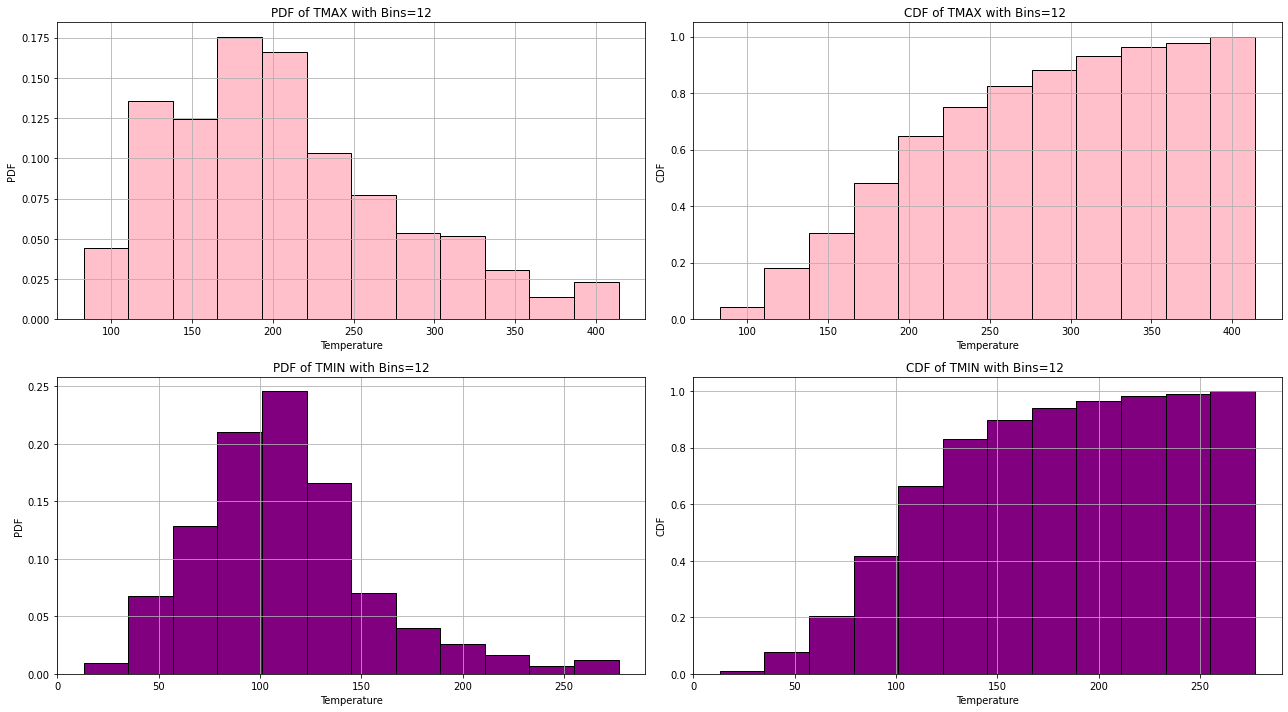

In [ ]:
n_equal_bin = 12  # Number of bins
#getting the frequencies of various bins
freqMX , binsMX= np.histogram(tmax,bins=n_equal_bin) 
norm_freqMX=pd.Series(freqMX/freqMX.sum())#normalizing the frequencies
cummulative_freqMX=[];
cummulative_freqMX.append(norm_freqMX[0]);
for i in range(1,len(norm_freqMX)):
  cummulative_freqMX.append(norm_freqMX[i]+cummulative_freqMX[i-1]);
  

cummulative_freqMX=pd.Series(cummulative_freqMX);
freqMX=pd.Series(freqMX)
binsMX=pd.Series(binsMX)


n_equal_bin = 12  # Number of bins
 #getting the frequencies of various bins
freqMN , binsMN= np.histogram(tmin,bins=n_equal_bin)
norm_freqMN=pd.Series(freqMN/freqMN.sum())#normalizing the frequencies
cummulative_freqMN=[];
cummulative_freqMN.append(norm_freqMN[0]);
for i in range(1,len(norm_freqMN)):
  cummulative_freqMN.append(norm_freqMN[i]+cummulative_freqMN[i-1]);
cummulative_freqMN=pd.Series(cummulative_freqMN);
freqMN=pd.Series(freqMN)
binsMN=pd.Series(binsMN)


#PRINTING BINS, FREQUENCY AND THE VALUES OBTAINED USING CDF
frame={'BinsTMAX ':binsMX,'NormFreqTMAX': norm_freqMX ,'CDF_TMAX':
       cummulative_freqMX,'BinsTMIN ':binsMN,'NormFreqTMIN': norm_freqMN ,
       'CDF_TMIN':cummulative_freqMN}
norm_data=pd.DataFrame(frame)
print(norm_data)



#PLOTTING PDF AND CDF
fig = plt.figure()
fig, axs = plt.subplots(2, 2,figsize =(18, 10),tight_layout = True) 
N, bins, patches=axs[0][0].hist(df['TMAX'],color="pink",edgecolor="black", 
                                bins=binsMX,weights=np.zeros_like(tmax) + 1. / len(tmax))
axs[0][0].set_xlabel('Temperature')
axs[0][0].set_ylabel('PDF');
axs[0][0].set_title('PDF of TMAX with Bins=12')
axs[0][0].grid()



N, bins, patches=axs[0][1].hist(df['TMAX'],color="pink",edgecolor="black", bins=binsMX,weights=np.zeros_like(tmax) + 1. / len(tmax),cumulative=1)
axs[0][1].set_xlabel('Temperature')
axs[0][1].set_ylabel('CDF');
axs[0][1].set_title('CDF of TMAX with Bins=12 ')
axs[0][1].grid()



N, bins, patches=axs[1][0].hist(tmin,color="purple",edgecolor="black", bins=binsMN,weights=np.zeros_like(tmin) + 1. / len(tmin))
axs[1][0].set_xlabel('Temperature')
axs[1][0].set_ylabel('PDF');
axs[1][0].set_title('PDF of TMIN with Bins=12')
axs[1][0].grid()



N, bins, patches=axs[1][1].hist(tmin,color="purple",edgecolor="black", bins=binsMN,weights=np.zeros_like(tmin) + 1. / len(tmin),cumulative=1)
axs[1][1].set_xlabel('Temperature')
axs[1][1].set_ylabel('CDF');
axs[1][1].set_title('CDF of TMIN with Bins=12 ')
axs[1][1].grid()



**Q2) Calculate Pearson correlation coefficient (r) between Tmax and Tmin .**

In [ ]:
r,pvalue=sts.pearsonr(tmax,tmin)
print('Pearson correlation coefficient(r) value: ',r)


Pearson correlation coefficient(r) value:  0.7540106271285367


**Q3) Interpret the r^2 value you got.**

---


As r>0.7 and hence (r-square) > 0.5 we can say that there is a large correlation between TMAX and TMIN in the given dataset.  Also, it means that even when we switch the axis we would be 56.85% right about the prediction of the other quantity i.e., in our plot if we could find the value of TMIN for a given TMAX when x,y axis are TMAX, TMIN then if we were to swap TMAX and TMIN as y,x axis then also we could rightly determine TMAX from the corresponding value of TMIN with accuracy of 56.85%. 


In [ ]:
print('R sqaure value: ',r*r);

R sqaure value:  0.5685320258227693


**Q4-6) Plot the scatter plot from of Tmax → Tmin. Now plot the smoothed scatter plot without sorting and observe the plot.
Plot smoothed scatter plot with sorting and observe the difference with the plot of above.**

Function to smooth the graph with attributes:

* df:DataFrame

* attr: Attribute with respect to which we need to sort

* attr2: Second attribute to be taken into consideration

* points: The number of points needed to smooth the graph

In [ ]:

def smoothed_plot(df,attr,attr2,points):
  smax=[];tt=[];
  i=0;t=0;s=0;
  count=int(len(df[attr])/points);
  for i in range(1,len(df[attr])+1):
    s=s+(df[attr2][i-1]);
    t=t+(df[attr][i-1]);  
    if i%(count)==0:
      smax.append(s/count);
      tt.append(t/count);
      s=0;t=0;
  s=0;t=0;
  temp= len(df[attr]) - count*points; #FOR THE REMAINING POINTS AS LENGTH OF ARRAY IS NOT DIVISIBLE BY 10
  for i in range(len(df[attr])-temp,len(df[attr])):
    s=s+(df[attr2][i-1])/temp;
    t=t+(df[attr][i-1])/temp;     
  if (s!=0 and t!=0):
    smax.append(s);tt.append(t);
  return smax,tt;

<Figure size 432x288 with 0 Axes>

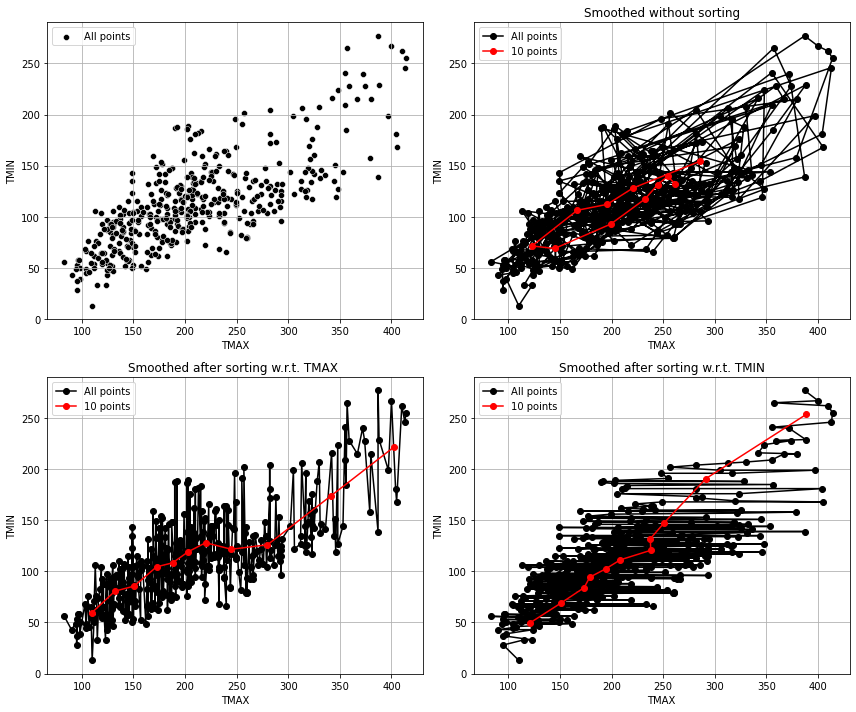

In [ ]:
fig = plt.figure()
fig, axs = plt.subplots(2, 2,figsize =(12, 10),tight_layout = True) 


#SCATTER PLOT
sbrn.scatterplot(ax=axs[0][0],data=df,x='TMAX',y='TMIN',color='k',label='All points')
axs[0][0].grid()
axs[0][0].legend()

#SMOOTHED SCATTER WITHOUT SORTING
smax,tt=smoothed_plot(df,'TMAX','TMIN',10);  
sm=pd.DataFrame({'Tmin':smax , 'Tmax':tt})
axs[0][1].plot(df['TMAX'],df['TMIN'],'k-o',label='All points')
axs[0][1].plot(tt,smax,'r-o',label='10 points')
axs[0][1].set_xlabel('TMAX')
axs[0][1].set_ylabel('TMIN')
axs[0][1].set_title('Smoothed without sorting')
axs[0][1].grid()
axs[0][1].legend()



# SMOOTHED SCATTER AFTER SORTING WITH RESPECT TO TMAX
df2=df.sort_values('TMAX')
df2.reset_index(drop=True,inplace=True)
smax,tt=smoothed_plot(df2,'TMAX','TMIN',10);
sm=pd.DataFrame({'Tmin':smax , 'Tmax':tt})

axs[1][0].plot(df2['TMAX'],df2['TMIN'],'k-o',label='All points')
axs[1][0].plot(sm['Tmax'],sm['Tmin'],'r-o',label='10 points')
axs[1][0].set_xlabel('TMAX')
axs[1][0].set_ylabel('TMIN')
axs[1][0].set_title('Smoothed after sorting w.r.t. TMAX ')
axs[1][0].grid()
axs[1][0].legend()



# SMOOTHED SCATTER AFTER SORTING WITH RESPECT TO TMIN
df3=df.sort_values('TMIN')
df3.reset_index(drop=True,inplace=True)
smax,tt=smoothed_plot(df3,'TMIN','TMAX',10);
sm=pd.DataFrame({'Tmax':smax , 'Tmin':tt})

axs[1][1].plot(df3['TMAX'],df3['TMIN'],'k-o',label='All points')
axs[1][1].plot(sm['Tmax'],sm['Tmin'],'r-o',label='10 points')
axs[1][1].set_xlabel('TMAX')
axs[1][1].set_ylabel('TMIN')
axs[1][1].set_title('Smoothed after sorting w.r.t. TMIN')
axs[1][1].grid()
axs[1][1].legend()


**State how smoothed scatter plot is in some ways better than usual scatter
plot.**

---
Smoothed plot without sorting do not lead us to any concrete observation or any useful result. We can observe from the plots that the smoothed plot obtained after sorting (10 points in red) gives a linear trend which represents how correlated TMAX and TMIN are. The slope of the line and the linearity confirms the r value obtained previously. Even when we sorted the array w.r.t. TMIN instead of TMAX we still obtained a similar line, again confirming the correlation between the two attributes.

In addition to this we also observed that the smoothed scatter plot gives us better interpretation of the relationship between two attributes as compared to the regular scatter plot which gives no obvious output in terms of correlation.

**Extra plot**

<Figure size 432x288 with 0 Axes>

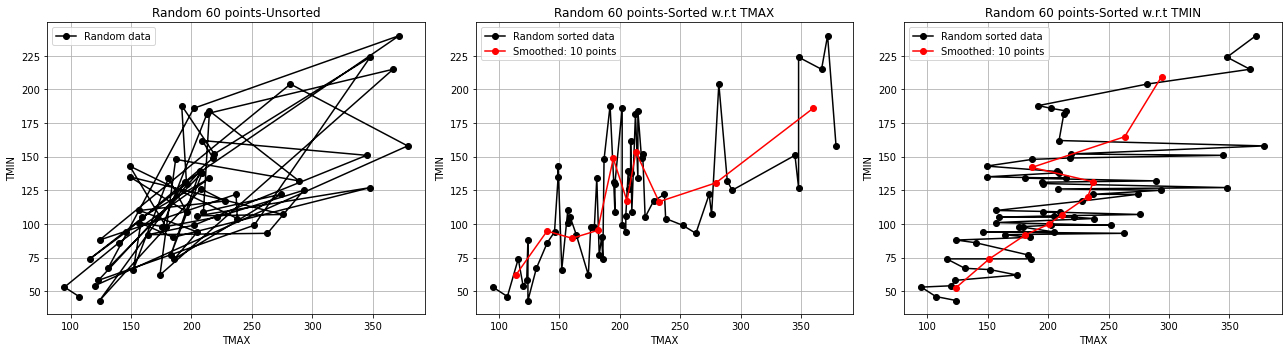

In [ ]:
random_data=df.sample(n=60)
fig = plt.figure()
fig, axs = plt.subplots(1, 3,figsize =(18, 5),tight_layout = True) 
axs[0].plot(random_data['TMAX'],random_data['TMIN'],'k-o',label='Random data')
axs[0].grid()
axs[0].set_title('Random 60 points-Unsorted')
axs[0].set_ylabel('TMIN')
axs[0].set_xlabel('TMAX')
axs[0].legend()


dfr=random_data.sort_values('TMAX')
dfr.reset_index(drop=True,inplace=True)
smax,tt=smoothed_plot(dfr,'TMAX','TMIN',10);
sm=pd.DataFrame({'Tmin':smax , 'Tmax':tt})
axs[1].plot(dfr['TMAX'],dfr['TMIN'],'k-o',label='Random sorted data')
axs[1].plot(sm['Tmax'],sm['Tmin'],'r-o',label='Smoothed: 10 points')
axs[1].grid()
axs[1].set_title('Random 60 points-Sorted w.r.t TMAX')
axs[1].set_ylabel('TMIN')
axs[1].set_xlabel('TMAX')
axs[1].legend()


dfr2=random_data.sort_values('TMIN')
dfr2.reset_index(drop=True,inplace=True)
smax,tt=smoothed_plot(dfr2,'TMIN','TMAX',10);
sm=pd.DataFrame({'Tmax':smax , 'Tmin':tt})
axs[2].plot(dfr2['TMAX'],dfr2['TMIN'],'k-o',label='Random sorted data')
axs[2].plot(sm['Tmax'],sm['Tmin'],'r-o',label='Smoothed: 10 points')
axs[2].grid()
axs[2].set_title('Random 60 points-Sorted w.r.t TMIN')
axs[2].set_ylabel('TMIN')
axs[2].set_xlabel('TMAX')
axs[2].legend()